In [1]:
import pandas as pd

In [3]:
#Load the Datasets
historical_data = pd.read_csv('historical_data.csv')
sentiment = pd.read_csv('fear_greed_index.csv')

In [4]:
# Convert timestamp column
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], errors='coerce')

# Extract only date
historical_data['date'] = historical_data['Timestamp IST'].dt.date

# Convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date

# Merge
df = historical_data.merge(sentiment, on='date', how='left')

In [5]:
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60455,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,18.1870,1.07,19.46,SELL,NaT,829.875325,Sell,-0.952618,0x3260a85f20af1978c47c04224183780202ed00ff7b24...,88978154957,True,0.005838,4.580000e+14,1.750000e+12,NaT,NaN,NaN,NaN
60456,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,18.1870,1.10,20.01,SELL,NaT,828.805325,Sell,-0.979327,0x3260a85f20af1978c47c04224183780202ed00ff7b24...,88978154957,True,0.006001,2.820000e+14,1.750000e+12,NaT,NaN,NaN,NaN
60457,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,18.1870,1.16,21.10,SELL,NaT,827.705325,Sell,-1.032745,0x3260a85f20af1978c47c04224183780202ed00ff7b24...,88978154957,True,0.006329,1.110000e+15,1.750000e+12,NaT,NaN,NaN,NaN
60458,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,18.1830,1.13,20.55,SELL,NaT,826.545325,Sell,-1.010556,0x050c165b40800e42cf3a042241838a02016a0099b5cd...,88978159479,True,0.006164,1.060000e+15,1.750000e+12,NaT,NaN,NaN,NaN


In [6]:
#Changing the Strings into Numerics
df['Execution Price'] = pd.to_numeric(df['Execution Price'], errors='coerce')
df['Size Tokens'] = pd.to_numeric(df['Size Tokens'], errors='coerce')
df['Size USD'] = pd.to_numeric(df['Size USD'], errors='coerce')
df['Start Position'] = pd.to_numeric(df['Start Position'], errors='coerce')
df['Closed PnL'] = pd.to_numeric(df['Closed PnL'], errors='coerce')
df['Fee'] = pd.to_numeric(df['Fee'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors = 'coerce')

In [7]:
#Removing Nulls
df = df.dropna()                    #Remove rows with missing essential values
df = df[df['Size USD'] > 0]         #Remove trades with size = 0

In [8]:
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56157,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,15.5340,18.66,289.86,SELL,2025-04-03 15:24:00,3550.029466,Sell,-16.364342,0xedbc244b5a2dc3f63945041ee280ae020137002c42ad...,76991354947,True,0.101452,3.620000e+14,1.740000e+12,2025-04-03,1.743658e+09,25.0,Fear
56158,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,15.5330,132.26,2054.39,SELL,2025-04-03 15:24:00,3531.369466,Sell,-116.120892,0xedbc244b5a2dc3f63945041ee280ae020137002c42ad...,76991354947,True,0.719038,8.860000e+14,1.740000e+12,2025-04-03,1.743658e+09,25.0,Fear
56159,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,15.5260,13.06,202.77,SELL,2025-04-03 15:24:00,3399.109466,Sell,-11.557765,0xedbc244b5a2dc3f63945041ee280ae020137002c42ad...,76991354947,True,0.070969,4.730000e+14,1.740000e+12,2025-04-03,1.743658e+09,25.0,Fear
56160,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,15.5240,3386.04,52564.88,SELL,2025-04-03 15:24:00,3386.049466,Sell,-3003.330755,0xedbc244b5a2dc3f63945041ee280ae020137002c42ad...,76991354947,True,18.397709,4.900000e+14,1.740000e+12,2025-04-03,1.743658e+09,25.0,Fear


In [9]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("outputs", exist_ok=True)

In [10]:
#1.Basic Overview

print("Shape of the dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nBasic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Shape of the dataset: (14322, 20)

Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14322 entries, 0 to 56737
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           14322 non-null  object        
 1   Coin              14322 non-null  object        
 2   Execution Price   14322 non-null  float64       
 3   Size Tokens       14322 non-null  float64       
 4   Size USD          14322 non-null  float64       
 5   Side              14322 non-null  object        
 6   Timestamp IST     14322 non-null  datetime64[ns]
 7   Start Position    14322 non-null  floa

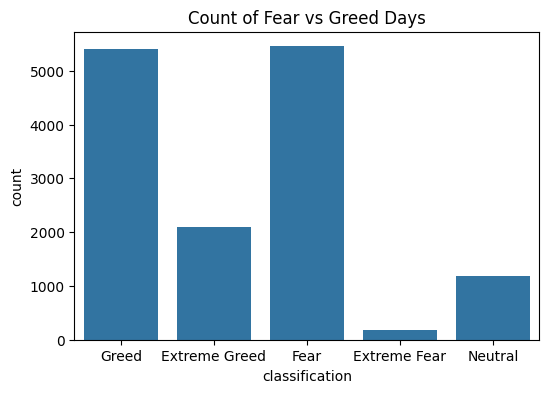

In [11]:
#2.Sentiment Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='classification')
plt.title("Count of Fear vs Greed Days")
plt.savefig("outputs/sentiment_count.png")
plt.show()


Average Closed PnL by Sentiment:
 classification
Extreme Fear      20.289523
Extreme Greed    456.166481
Fear             270.071673
Greed             83.927237
Neutral           37.430126
Name: Closed PnL, dtype: float64


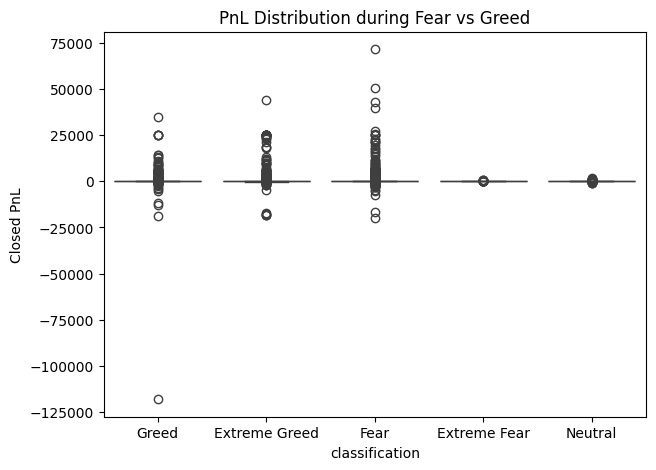

In [12]:
#3. PNL Analysis
pnl_mean = df.groupby("classification")["Closed PnL"].mean()
print("\nAverage Closed PnL by Sentiment:\n", pnl_mean)

# Boxplot of PnL by sentiment
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='classification', y='Closed PnL')
plt.title("PnL Distribution during Fear vs Greed")
plt.savefig("outputs/pnl_boxplot.png")
plt.show()


Average Size USD by Sentiment:
 classification
Extreme Fear     5928.485489
Extreme Greed    5996.207327
Fear             9914.282894
Greed            8283.235079
Neutral          8181.391005
Name: Size USD, dtype: float64


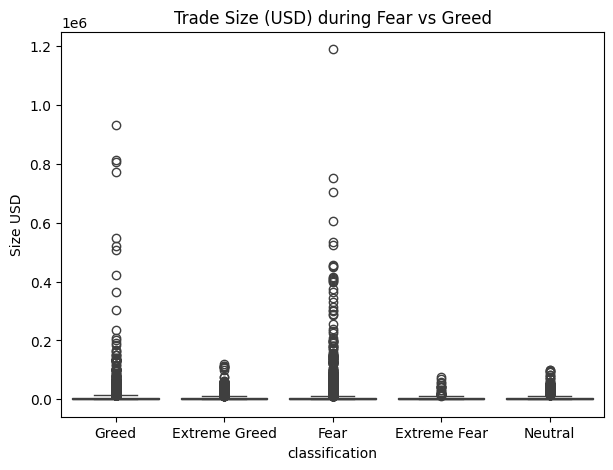

In [13]:
#4. Average size USD by sentiment - SIZE ANALYSIS

size_mean = df.groupby("classification")["Size USD"].mean()
print("\nAverage Size USD by Sentiment:\n", size_mean)

# Boxplot of size distribution
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='classification', y='Size USD')
plt.title("Trade Size (USD) during Fear vs Greed")
plt.savefig("outputs/size_boxplot.png")
plt.show()


Long/Short Count by Sentiment:
 Direction         Buy  Close Long  Close Short  Long > Short  Open Long  \
classification                                                            
Extreme Fear     34.0        29.0          NaN           NaN      100.0   
Extreme Greed   189.0       411.0        145.0           NaN      363.0   
Fear            324.0      1048.0       1630.0           1.0      726.0   
Greed           776.0      1192.0       1069.0           9.0      971.0   
Neutral          90.0       425.0        157.0           NaN      244.0   

Direction       Open Short   Sell  Short > Long  Spot Dust Conversion  
classification                                                         
Extreme Fear           6.0   15.0           NaN                   NaN  
Extreme Greed        352.0  629.0           NaN                   6.0  
Fear                1578.0  141.0           NaN                   4.0  
Greed                893.0  485.0           9.0                   3.0  
Neutral  

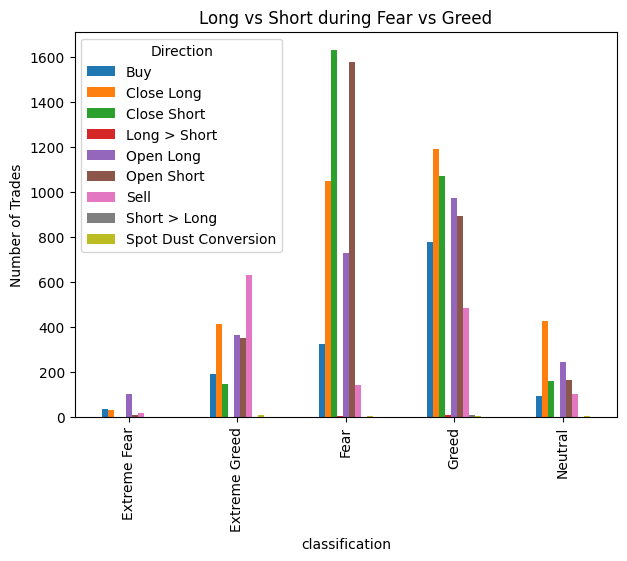

In [14]:
# 5. DIRECTION ANALYSIS (LONG vs SHORT)

direction_count = df.groupby(['classification', 'Direction']).size().unstack()
print("\nLong/Short Count by Sentiment:\n", direction_count)

direction_count.plot(kind='bar', figsize=(7,5))
plt.title("Long vs Short during Fear vs Greed")
plt.ylabel("Number of Trades")
plt.savefig("outputs/longshort_bar.png")
plt.show()

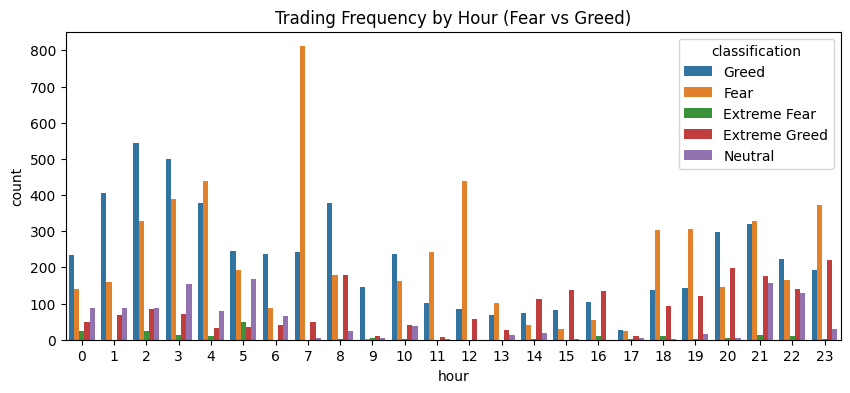

In [15]:
# 6. HOURLY BEHAVIOR

df['hour'] = pd.to_datetime(df['Timestamp IST']).dt.hour

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='hour', hue='classification')
plt.title("Trading Frequency by Hour (Fear vs Greed)")
plt.savefig("outputs/hourly_freq.png")
plt.show()


Top 10 Most Profitable Accounts:
 Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    1.478495e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    9.655887e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    1.972949e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    1.425837e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    6.054430e+04
0x4f93fead39b70a1824f981a54d4e55b278e9f760    3.886884e+04
0xae5eacaf9c6b9111fd53034a602c192a04e082ed    2.092551e+04
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    1.285882e+04
0x8381e6d82f1affd39a336e143e081ef7620a3b7f    1.102264e+04
0x420ab45e0bd8863569a5efbb9c05d91f40624641    1.762460e+03
Name: Closed PnL, dtype: float64


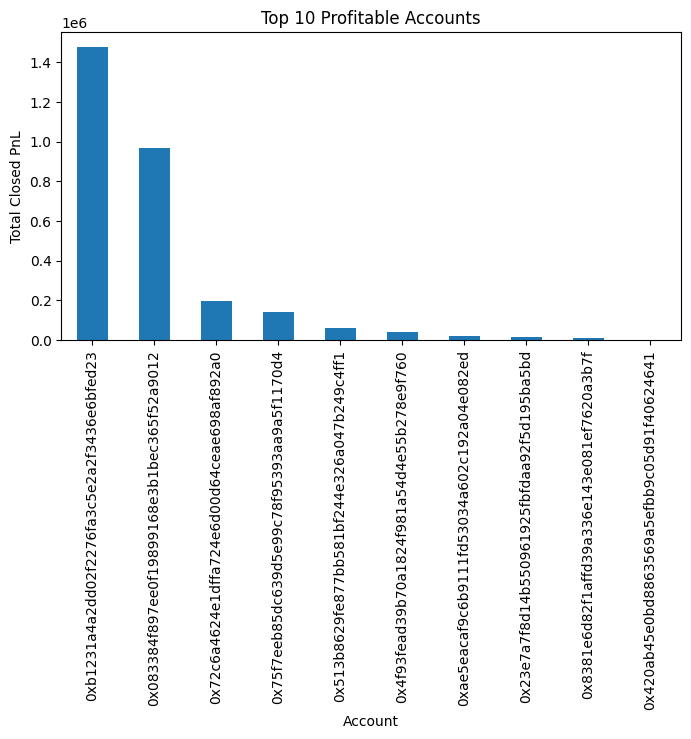

In [16]:
# 7. ACCOUNT PROFITABILITY

top_accounts = df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Profitable Accounts:\n", top_accounts)

top_accounts.plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Profitable Accounts")
plt.ylabel("Total Closed PnL")
plt.savefig("outputs/top_accounts_pnl.png")
plt.show()



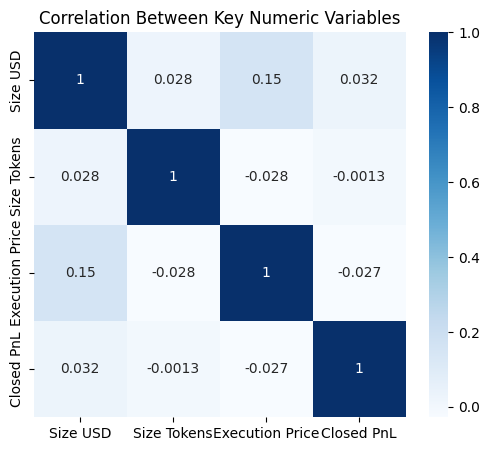

In [17]:
# 8. CORRELATIONS

corr = df[['Size USD', 'Size Tokens', 'Execution Price', 'Closed PnL']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Between Key Numeric Variables")
plt.savefig("outputs/correlation_heatmap.png")
plt.show()